In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
np.set_printoptions(threshold=np.inf)

In [2]:
df = pd.read_csv('D:\\data003.csv')
df = df.drop(columns='Unnamed: 0')
df = df.assign(delta_v = df.veh_speed_pre-df.veh_speed_fol)
df = df.assign(delta_x = df.Local_Y_pre-df.Local_Y_fol)
df

,veh_id,Frame_id,Local_Y_fol,veh_length_fol,veh_class_fol,veh_speed_fol,veh_Acc_fol,Lane_id_fol,pre_veh_id,Spacing_fol,...,veh_class_pre,veh_speed_pre,veh_Acc_pre,follow_veh_id_pre,pre_fol_id,CF_start,CF_end,Time(s),delta_v,delta_x
0,280,616,9.885578,4.2672,2,12.192000,0.000000,1,271,10.354056,...,2,12.284642,-0.234356,280,271_280,616,1232,61.6,0.092642,13.816040
1,280,617,11.104778,4.2672,2,12.192000,0.000000,1,271,10.351008,...,2,12.253282,-0.322260,280,271_280,616,1232,61.6,0.061282,13.839252
2,280,618,12.323978,4.2672,2,12.192000,0.000000,1,271,10.344912,...,2,12.213805,-0.396502,280,271_280,616,1232,61.6,0.021805,13.856983
3,280,619,13.543178,4.2672,2,12.192000,0.000000,1,271,10.335768,...,2,12.161361,-0.552778,280,271_280,616,1232,61.6,-0.030639,13.869009
4,280,620,14.762074,4.2672,2,12.192000,0.000000,1,271,10.329672,...,2,12.101677,-0.526436,280,271_280,616,1232,61.6,-0.090323,13.874725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266576,3032,9481,553.946873,4.5720,2,16.373856,-0.381000,1,3024,84.731352,...,2,15.788332,-1.453566,3032,3024_3032,8717,9485,76.8,-0.585524,86.639094
266577,3032,9482,555.575419,4.5720,2,16.398240,0.762000,1,3024,84.642960,...,2,15.598384,-1.721712,3032,3024_3032,8717,9485,76.8,-0.799856,86.546276
266578,3032,9483,557.212500,4.5720,2,16.504920,1.658112,1,3024,84.569808,...,2,15.374207,-1.674975,3032,3024_3032,8717,9485,76.8,-1.130713,86.413561
266579,3032,9484,558.872441,4.5720,2,16.645128,1.359408,1,3024,84.280248,...,2,15.191914,-1.096016,3032,3024_3032,8717,9485,76.8,-1.453214,86.220572


In [3]:
def Reaction_time(y,X):
    est=sm.OLS(y,X)
    results = est.fit()
    return results
group = df.groupby('pre_fol_id')
for g in group:
    r2 = []
    pre_fol_id = g[0]
    df_group = g[1]
    delta_v = df_group.delta_v.values
    acc = df_group.veh_Acc_fol.values
    for i in np.arange(1,20):
        delta_v = delta_v[:-i]
        acc = acc[i:]
        r2.append(Reaction_time(acc,delta_v).rsquared)
    r2 = np.array(r2)
    reaction_time = (np.argmax(r2)+1)/10
    df.loc[df['pre_fol_id']==pre_fol_id,'reaction_time']= reaction_time
df

,veh_id,Frame_id,Local_Y_fol,veh_length_fol,veh_class_fol,veh_speed_fol,veh_Acc_fol,Lane_id_fol,pre_veh_id,Spacing_fol,...,veh_speed_pre,veh_Acc_pre,follow_veh_id_pre,pre_fol_id,CF_start,CF_end,Time(s),delta_v,delta_x,reaction_time
0,280,616,9.885578,4.2672,2,12.192000,0.000000,1,271,10.354056,...,12.284642,-0.234356,280,271_280,616,1232,61.6,0.092642,13.816040,0.3
1,280,617,11.104778,4.2672,2,12.192000,0.000000,1,271,10.351008,...,12.253282,-0.322260,280,271_280,616,1232,61.6,0.061282,13.839252,0.3
2,280,618,12.323978,4.2672,2,12.192000,0.000000,1,271,10.344912,...,12.213805,-0.396502,280,271_280,616,1232,61.6,0.021805,13.856983,0.3
3,280,619,13.543178,4.2672,2,12.192000,0.000000,1,271,10.335768,...,12.161361,-0.552778,280,271_280,616,1232,61.6,-0.030639,13.869009,0.3
4,280,620,14.762074,4.2672,2,12.192000,0.000000,1,271,10.329672,...,12.101677,-0.526436,280,271_280,616,1232,61.6,-0.090323,13.874725,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266576,3032,9481,553.946873,4.5720,2,16.373856,-0.381000,1,3024,84.731352,...,15.788332,-1.453566,3032,3024_3032,8717,9485,76.8,-0.585524,86.639094,0.2
266577,3032,9482,555.575419,4.5720,2,16.398240,0.762000,1,3024,84.642960,...,15.598384,-1.721712,3032,3024_3032,8717,9485,76.8,-0.799856,86.546276,0.2
266578,3032,9483,557.212500,4.5720,2,16.504920,1.658112,1,3024,84.569808,...,15.374207,-1.674975,3032,3024_3032,8717,9485,76.8,-1.130713,86.413561,0.2
266579,3032,9484,558.872441,4.5720,2,16.645128,1.359408,1,3024,84.280248,...,15.191914,-1.096016,3032,3024_3032,8717,9485,76.8,-1.453214,86.220572,0.2


In [4]:
df0 = df[df['pre_fol_id']=='280_282']
df0

,veh_id,Frame_id,Local_Y_fol,veh_length_fol,veh_class_fol,veh_speed_fol,veh_Acc_fol,Lane_id_fol,pre_veh_id,Spacing_fol,...,veh_speed_pre,veh_Acc_pre,follow_veh_id_pre,pre_fol_id,CF_start,CF_end,Time(s),delta_v,delta_x,reaction_time
617,282,628,8.209178,3.048,2,13.045440,0.000000,1,280,12.039600,...,12.142900,-0.377743,282,280_282,628,1238,61.0,-0.902540,14.915919,0.4
618,282,629,9.557004,3.048,2,13.045440,0.000000,1,280,11.911584,...,12.078216,-0.552946,282,280_282,628,1238,61.0,-0.967224,14.800946,0.4
619,282,630,10.928604,3.048,2,13.045440,0.000000,1,280,11.753088,...,12.005204,-0.546861,282,280_282,628,1238,61.0,-1.040236,14.653007,0.4
620,282,631,12.299899,3.048,2,13.045440,0.000000,1,280,11.591544,...,11.935120,-0.523224,282,280_282,628,1238,61.0,-1.110320,14.497144,0.4
621,282,632,13.519099,3.048,2,13.045440,0.000000,1,280,11.585448,...,11.866957,-0.505362,282,280_282,628,1238,61.0,-1.178483,14.485900,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,282,1234,605.603158,3.048,2,18.669000,0.789432,1,280,30.693360,...,17.951050,0.561923,282,280_282,628,1238,61.0,-0.717950,32.740870,0.4
1224,282,1235,607.476763,3.048,2,18.723864,0.326136,1,280,30.641544,...,18.013463,0.584434,282,280_282,628,1238,61.0,-0.710401,32.601084,0.4
1225,282,1236,609.353112,3.048,2,18.748248,0.030480,1,280,30.598872,...,18.084571,0.672471,282,280_282,628,1238,61.0,-0.663677,32.460852,0.4
1226,282,1237,611.225194,3.048,2,18.778728,0.484632,1,280,30.553152,...,18.167021,0.624158,282,280_282,628,1238,61.0,-0.611707,32.330357,0.4


In [5]:
a_max = df0['veh_Acc_fol'].values.max()

In [6]:
v_max = df0['veh_speed_fol'].values.max()

In [7]:
acc = df0['veh_Acc_fol'].values
delta_x = df0['delta_x'].values
delta_v = df0['delta_v'].values
v= df0['veh_speed_fol'].values
reaction = df0['reaction_time'].values[0]

In [8]:
y0 = acc/a_max
y1 = np.sqrt(-y0+1-(v/v_max)**4)
# y1=np.delete(y1,np.where(np.isnan(y1)))
y2 = y1*delta_x
y3 = y2-reaction*v
v=np.delete(v,np.where(np.isnan(y1)))
delta_v = np.delete(delta_v,np.where(np.isnan(y1)))
y3 = np.delete(y3,np.where(np.isnan(y3)))

<ipython-input-8-fd9bf1c67427>:2: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(-y0+1-(v/v_max)**4)


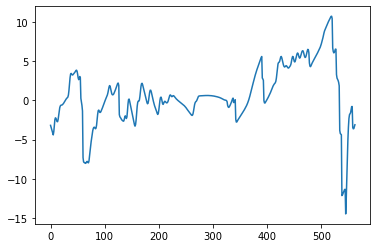

In [9]:
k = v*delta_v*0.5/a_max**0.5
plt.plot(k)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.10e-34
Time:                        02:57:29   Log-Likelihood:                -1670.2
No. Observations:                 563   AIC:                             3344.
Df Residuals:                     561   BIC:                             3353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7890      0.202     48.526      0.0

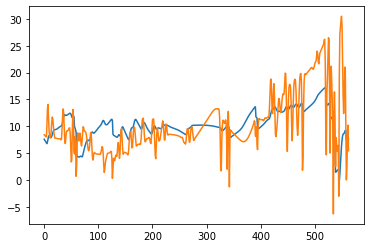

In [10]:
X = k
X = sm.add_constant(X)
Y = y3
model = sm.OLS(Y,X)
results = model.fit()
r2=results.rsquared
X_prime = X
y_hat =results.predict(X_prime)
plt.plot(y_hat)
plt.plot(Y)
r2
print(results.summary())

-2.0788117742855987
2.3942237872206653


<ipython-input-11-31ff8decf0b0>:19: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  return sp.sqrt(sp.mean((y_test - y) ** 2))
<ipython-input-11-31ff8decf0b0>:19: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return sp.sqrt(sp.mean((y_test - y) ** 2))


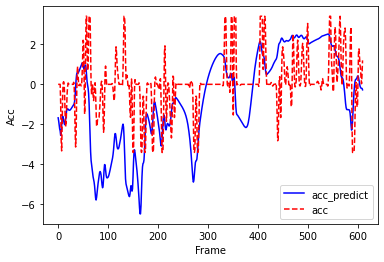

In [11]:
import scipy as sp
acc = df0['veh_Acc_fol'].values
delta_x = df0['delta_x'].values
delta_v = df0['delta_v'].values
v= df0['veh_speed_fol'].values
reaction = df0['reaction_time'].values[0]
s0 = 9.7890
beta = (1/0.6876)**2
s_star = s0 + reaction*v-v*delta_v/(2*(a_max*beta)**0.5)
acc_test = a_max*(1-(v/v_max)**4-(s_star/delta_x)**2)
plt.plot(acc_test,label = 'acc_predict',c = 'b')
plt.plot(acc,linestyle = '--',label = 'acc',c= 'r')
plt.xlabel("Frame")
plt.ylabel('Acc')
plt.legend()
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()
def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))
print(R2(acc_test,acc))
print(rmse(acc_test,acc))
X_prime = X
y_hat =results.predict(X_prime)


In [12]:
X = k
y = y3
##构造训练集和测试集
from sklearn.model_selection import train_test_split  #这里是引用了交叉验证
X_train,X_test, y_train, y_test = train_test_split(X, y)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print(model)
print(linreg.intercept_)
print(linreg.coef_)
# pair the feature names with the coefficients
y_pred = linreg.predict(X_test)
#计算y预测的RMSE
print(y_pred.shape,y_test.shape)
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test[i])**2
sum_erro=np.sqrt(sum_mean/72)
# 计算RMSE
print("RMSE:",sum_erro)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("X")
plt.ylabel('Y')
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[-2.41736310e-01 -1.52028765e+00  4.65013496e+00 -1.60301643e+00
  1.86358541e-01  6.46188820e-01 -2.06269553e+00  1.08764757e+00
 -2.11307937e+00  8.62405297e+00  5.91551785e-01  6.98622862e-01
 -9.79554343e-02  3.22637001e+00 -2.75386864e+00  1.02923673e+01
  6.16099971e-01 -7.79184034e+00  2.07743698e+00 -8.35583697e-01
  1.01570598e+01  1.70162390e+00 -3.42408514e+00  1.55696023e-01
 -5.90853053e-01  5.88267700e+00  5.57185755e-01  5.70424442e+00
  7.69178324e-01  3.33918365e+00  6.45883220e+00  4.99904981e+00
  4.75204725e+00 -8.79419454e-01  1.04227613e+01 -1.85702178e-01
  5.65361855e+00  2.16953239e+00  4.66190910e-01 -5.26722761e-01
  6.00928347e-01  3.04133369e+00  1.36361379e+00 -7.96475974e+00
  8.23736150e-01  1.39560306e-01 -2.26820046e-01  5.50395952e+00
 -3.98761207e+00  2.85470543e+00 -5.13408676e+00  2.12676352e+00
 -1.81404970e+00  6.21694658e-01  2.90686226e+00 -2.12766872e-01
  1.27665348e-01 -3.59958638e+00 -7.53914534e-01 -2.43654456e+00
  2.17747523e+00  1.88869856e+00 -2.31150773e+00  6.04954522e+00
 -1.23505292e+00 -1.77072077e+00 -1.21537443e+00 -4.39980896e+00
  9.71522412e+00  7.20687858e+00  5.84747998e-01 -2.78373459e+00
 -3.43223296e+00 -1.72902831e+00  3.85271210e-01 -1.35018474e+00
  1.97643579e+00  3.70423902e+00 -7.08692989e-01  3.88206847e-01
 -1.29796073e+00 -2.12427000e+00 -6.66337266e-01 -1.57684147e-01
  1.00164285e+01 -1.77369817e+00 -3.17670634e-02  4.25639414e+00
  3.97406459e-01 -1.49538020e-01 -1.82833372e+00  1.08614478e+00
  5.78049759e+00 -9.90316393e+00  1.13033631e-02 -1.90091503e+00
  5.48950964e+00  1.96712419e-01  5.50849310e-01  3.34773561e+00
  1.21120802e+00  5.66761759e-02  1.16459647e+00  5.60026363e+00
  1.02548698e+00  6.61932737e+00 -1.31599044e+00 -3.91976984e+00
 -2.92885708e-01  6.22272549e-01 -2.43214210e+00  9.53683971e-02
  4.94097476e-01 -1.25553513e+01  4.83072509e-01  4.89318427e+00
  2.87628482e-01 -1.18267639e-01  9.87518353e-01  4.88985851e+00
  3.90030210e+00  3.81468524e+00  3.24072230e+00  5.74619924e+00
 -5.83896257e+00 -1.79600648e+00 -3.21806249e-01 -2.52524461e+00
 -4.89256049e-01  1.71425330e-01 -2.65104829e+00  6.19317914e-01
 -3.73698810e-01 -2.30894041e+00 -6.28080641e-01  6.48280539e+00
 -7.28751421e+00  2.82830322e+00  3.22182960e-02 -3.12576493e+00
 -1.95103264e+00  1.96609500e+00  3.28401193e+00 -1.05546840e+00
  7.20768627e-01 -3.46267509e+00  6.78508616e-01  8.32343708e+00
 -7.92407032e+00 -7.92794031e+00  5.85596406e-01  1.91104338e+00
  6.87459533e-01 -2.42274826e-01  5.28021782e+00  3.07137419e-02
  2.58735005e-01  4.99787895e-01  1.05680412e+01  6.53332408e+00
  5.46641695e+00 -1.53535820e+00  1.34609639e+00  2.80921680e-01
  6.52067988e+00 -3.82974387e+00 -5.53696409e-02  1.87902848e-01
 -1.16995135e+01 -5.25305356e+00 -2.68938770e-01 -5.33437549e-01
  2.21728354e-02 -4.31235828e-02 -9.79560612e-02  2.43275007e+00
  5.11036643e-01  1.13743002e+00  1.07249316e+01 -1.57906994e+00
  5.52440070e+00 -1.06993435e+00  6.34256042e+00  7.99880700e+00
  4.30538635e-01  6.00268482e-01 -3.62333216e+00 -1.26682166e+00
 -4.30385081e-01  6.17115677e+00 -1.38440006e+00  1.77019591e+00
  6.31492790e+00  5.24651530e+00  6.03812331e+00  1.92370945e-02
  3.32324544e+00  4.82511581e+00 -1.41757617e-01  1.79939350e+00
  2.04260309e-01  1.16735112e-01  7.04940032e-01  4.88831938e+00
 -1.91845154e+00  1.35286047e+00  1.27117887e+00 -1.58205978e+00
  6.14736472e-01 -2.15973791e-01  5.40521573e+00 -1.20601114e+01
  6.69534873e-02  3.84795456e+00 -4.75271194e+00  4.79834651e+00
 -1.37047468e+00 -4.12862865e-01  4.28714421e+00 -1.17892587e+00
  2.75775149e-01 -3.36721351e+00 -7.84948031e-01 -1.21694280e+00
  9.79750894e-01 -3.13429946e-01 -1.67625548e+00  6.22726118e-01
  5.60561950e+00 -6.15363024e-01  1.38411410e+00  5.36859717e-01
  4.42501213e+00  5.08510013e+00  5.29202732e+00  5.12248637e+00
  3.63643535e-01  1.37448135e-02 -7.92097797e-01  1.77895947e+00
 -5.49089994e-01 -4.58132545e-01  5.86999007e-01 -2.39273764e-01
 -1.44758903e+01  5.82038977e-01 -1.82667939e-01  5.48308184e+00
 -3.83161627e-01 -1.85759122e+00  2.83528221e+00 -1.60611322e-01
  5.60333967e+00 -2.57698904e+00 -3.65332024e-01  5.37927044e+00
  4.91603802e-01  1.74580835e-04  3.49832382e+00 -8.02460492e+00
  4.69382116e+00 -1.10369640e+00  4.65245507e+00  6.68997800e+00
 -3.43885936e+00  2.08163027e+00  6.07081304e+00  3.46834985e-01
  1.88800980e+00  2.72499476e+00  9.86979741e+00  4.37235330e+00
  2.64129675e+00 -2.40830181e+00  8.09581954e-01 -8.36036852e-01
 -6.01090531e-01  8.86847509e+00  4.10426673e-01 -1.38374780e+00
  4.59770597e+00 -8.01708565e+00  2.86589650e+00  4.33954439e+00
  7.45666508e+00  3.71195547e+00  4.33747666e+00  4.04530765e-02
 -1.62650250e+00 -1.71534016e+00  4.10598717e+00  2.66240949e-01
 -1.14990189e-01  4.28122827e+00  5.25052788e+00 -3.56900692e+00
  4.71310000e-01 -2.49320651e+00 -7.50588188e-01 -9.26366231e-01
  3.40818192e-01 -3.10858606e+00 -1.24453413e+00  1.63849432e+00
  4.45822642e-01  2.96468573e-01  3.46549813e+00  6.00248136e+00
 -1.49486624e-01 -1.48122231e-02  1.43396334e+00  4.45055503e+00
 -5.12212289e-01  1.69637329e+00 -9.32547916e-01 -2.71765054e-01
 -3.25045080e-01  8.30410859e-02 -6.56249834e-01 -3.59782370e-01
 -3.67235032e+00 -4.22311556e+00 -1.96992531e+00  9.20098085e+00
  4.17298576e+00  6.02797214e-01  6.97782467e+00  3.68945248e+00
 -2.49111734e+00  1.15211481e+00  6.09303461e-01 -7.71463207e+00
  2.36580233e-01  5.59114788e+00  1.29109917e+00  6.29929635e+00
 -1.06344302e+00 -3.41459618e+00  3.43996021e+00 -2.48944228e+00
  5.54952292e+00 -2.70540805e+00 -2.46093077e+00 -3.20029726e-01
 -2.65803367e-01  3.23974828e+00  4.76109294e+00 -2.71747508e+00
 -1.68027023e+00 -1.01300320e+00  6.10721060e-01  5.76695914e-01
  5.31350826e-01 -2.51912720e+00 -3.53288041e+00  9.54972354e+00
  4.30849837e+00 -1.53761735e+00 -3.15195307e+00  8.53994974e-01
 -3.09700503e+00 -3.53136639e+00 -4.69155686e-01  1.72581538e+00
 -6.40690076e-01  4.42055554e+00 -4.35625094e-01  2.97653176e+00
  6.78436372e+00  6.06053434e-01  5.91184898e+00 -3.18821063e-01
 -2.29715481e+00  8.19991184e-02 -4.16040509e+00  5.90296001e+00
  7.50763234e-01  5.16030527e-01  5.68003218e+00  2.71681664e+00
  5.30974056e-01 -1.65131091e-01  6.33031222e+00  5.48577469e-01
  5.99379811e-01 -1.00301557e-01  4.16353285e-01 -8.36798375e-01
  6.12655412e-01  3.64068418e-01  2.53238745e+00  2.28417377e+00
 -7.29180966e+00 -1.11785000e-02 -5.79556031e-01 -5.50725865e-01
 -1.13392862e+01  4.36528972e+00 -1.11198197e+00  4.95080201e-01
 -7.83530845e+00  7.05586592e-01  3.46411307e+00  6.16105374e+00
  1.85444457e+00  1.58141549e+00  3.05240053e-01 -2.27428223e+00
  1.04259754e+01  8.68561174e-01 -7.93214734e+00 -7.78703478e+00
  4.14984197e+00  2.24380908e+00 -1.21388322e+01  4.96476752e+00
  4.96985704e+00  4.48905253e-01 -4.75943543e-01 -2.22178894e+00
  1.03654036e+00  6.05472934e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()
def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))
print(R2(acc_test,acc))
print(rmse(acc_test,acc))

In [ ]:
plt.plot(acc_test)